# Data on Manifolds

## Set up

Before starting this tutorial, we import our visualization modules and their parameters.

In [4]:
import matplotlib
import matplotlib.pyplot as plt

import geomstats.visualization as visualization

visualization.tutorial_matplotlib()

We also import the backend that will be used for geomstats computations.

In [11]:
import geomstats.backend as gs

## From data on linear spaces to data on manifolds

The **science of Statistics** is defined as the collection of data, their analysis and interpretation. Statistical theory is usually defined for data belonging to vector spaces, which are _linear spaces_. For example, we know how to compute the mean of a data set of numbers, like the mean of students' weights in a classroom, or of multidimensional arrays, like the average 3D velocity vector of blood cells in a vessel.

Here is an example of the computation of the mean of two arrays of dimension 2.

In [27]:
from geomstats.geometry.euclidean import Euclidean

dim = 2
n_samples = 2

euclidean = Euclidean(dim=dim)
points_in_linear_space = euclidean.random_uniform(n_samples=n_samples)
print('Points in linear space:\n', points_in_linear_space)

linear_mean = gs.sum(points_in_linear_space, axis=0) / n_samples
print('Mean of points:\n', linear_mean)

Points in linear space:
 [[-0.06247509 -0.4670917 ]
 [-0.74233546 -0.78364365]]
Mean of points:
 [-0.40240527 -0.62536768]


We plot the points and their mean on the 2D Euclidean space, which is a linear space: a plane.

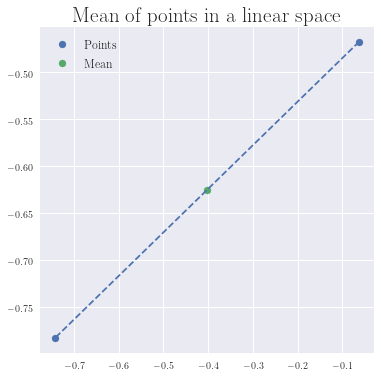

In [28]:
%matplotlib inline

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.scatter(points_in_linear_space[:, 0], points_in_linear_space[:, 1], label='Points')
ax.plot(points_in_linear_space[:, 0], points_in_linear_space[:, 1], linestyle='dashed')

ax.scatter(linear_mean[0], linear_mean[1], label='Mean')

ax.set_title('Mean of points in a linear space')
ax.legend()

What happens to the usual statistical theory when the data doesn't naturally belong to a linear space. For example, if we want to perform statistics on the coordinates of world cities, which lie on the earth: a sphere? 

The non-linear spaces we consider are called manifolds. A **manifold $M$ of dimension $m$** is a space that is allowed to be curved but that looks like a $m$-dimensional vector space in the neighborhood of every point. 

A sphere, like the earth, is a good example of a manifold. We know that the earth is curved, but at our scale we do not see its curvature. Can we still use linear statistics when data are defined on these manifolds, or shall we? 

Let's try.

In [29]:
from geomstats.geometry.hypersphere import Hypersphere

sphere = Hypersphere(dim=dim)
points_in_manifold = sphere.random_uniform(n_samples=n_samples)
print('Points in manifold:\n', points_in_manifold)

linear_mean = gs.sum(points_in_manifold, axis=0) / n_samples
print('Mean of points:\n', linear_mean)

Points in manifold:
 [[-0.63660209  0.75862917  0.13863462]
 [-0.46465469  0.54464988 -0.698178  ]]
Mean of points:
 [-0.55062839  0.65163953 -0.27977169]


We plot the points and their mean computed with the linear formula.

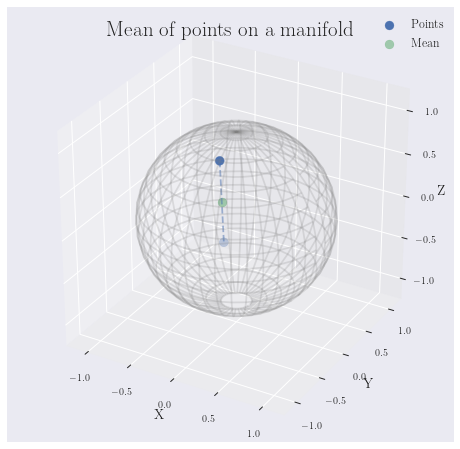

In [41]:
%matplotlib inline

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

visualization.plot(
    points_in_manifold, ax=ax, space='S2', label='Points', s=80)

ax.plot(
    points_in_manifold[:, 0], 
    points_in_manifold[:, 1], 
    points_in_manifold[:, 2], 
    linestyle='dashed', alpha=0.5)

ax.scatter(
    linear_mean[0], linear_mean[1], linear_mean[2], 
    label='Mean', s=80, alpha=0.5)

ax.set_title('Mean of points on a manifold')
ax.legend()

What happened? The mean of two points on a manifold (the sphere) is not on the manifold. In our example, the mean city is not on the earth. This leads to errors in statistical computations.

In [42]:
print(sphere.belongs(linear_mean))

False


For this reason, researchers aim to build a theory of statistics that is by construction compatible with any structure we equip the manifold with. This theory is called _Geometric Statistics_.

**Geometric Statistics** is a theory of statistics on manifolds, that takes into account their geometric structures. Geometric Statistics is therefore the child of two major pillars of Mathematics: Geometry and Statistics.

## Examples of data on manifolds

Why should we bother to build a whole new theory of statistics? Do we really have data that belong to spaces like the sphere illustrated in introduction?

Let's see some examples of data spaces that are naturally manifolds. By doing so, we will introduce the `visualization` module of `geomstats`.